In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[[173.5923913  105.71195652 106.60326087]
 [ 21.04026846  53.53691275  49.39597315]
 [ 23.08        50.48        49.44      ]
 [ 22.02857143  50.2         51.14285714]
 [ 23.61956522  50.93478261  42.39130435]
 [ 25.4         50.3         41.75      ]
 [ 44.70289855  48.26811594  33.30434783]]


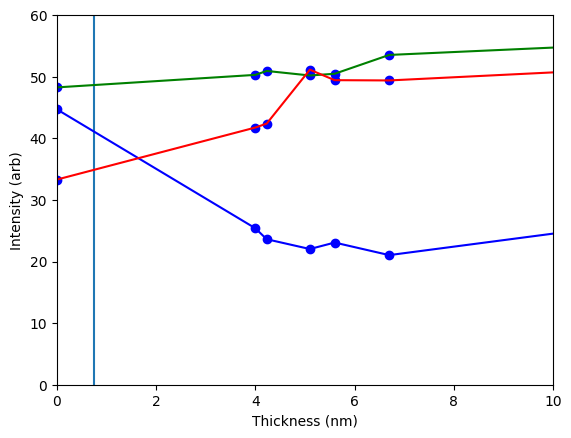

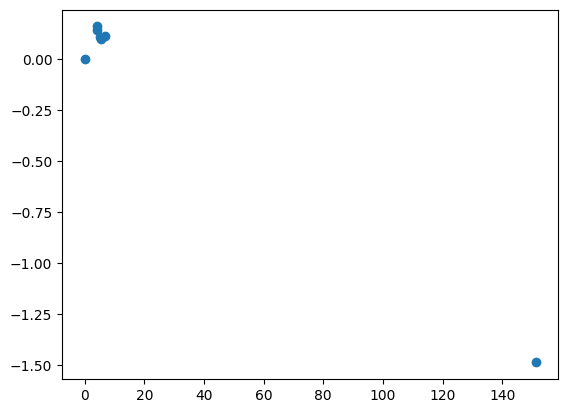

In [147]:
PATH = "line profile data/chip 2"
PATH2 = "line profile data/chip 3"

spectraldata10 = pd.read_csv("../Databases/spectraldata10.csv",header=0,index_col=0)

# print(spectraldata10)

def RGB(filename,PATH):
    
    df_A10 = pd.read_excel(PATH+"/"+filename)
    # print(df_A10)
    A10_B = np.average(df_A10["Blue(1)"].to_numpy())
    A10_R = np.average(df_A10["Red(1)"].to_numpy())
    A10_G = np.average(df_A10["Green(1)"].to_numpy())
    return np.array([A10_B,A10_G,A10_R])

A10 = RGB("A10.xlsx",PATH)
B15 = RGB("B15.xlsx",PATH)
C10_A1 = RGB("C10_A1.xlsx",PATH)
C10_A2 = RGB("C10_A2.xlsx",PATH)
D9 = RGB("D9.xlsx",PATH)
H12 = RGB("H12.xlsx",PATH)
N8 = RGB("N8.xlsx",PATH)
N15 = RGB("N15.xlsx",PATH)

C7 = RGB("C7.xlsx",PATH2)
D2 = RGB("D2.xlsx",PATH2)
D2_A2 = RGB("D2_A2.xlsx",PATH2)
D2_A3 = RGB("D2_A3.xlsx",PATH2)
G10_A1 = RGB("G10_A1.xlsx",PATH2)
G10_A2 = RGB("G10_A2.xlsx",PATH2)
N10_A1 = RGB("N10_A1.xlsx",PATH2)
N10_A2 = RGB("N10_A2.xlsx",PATH2)
N10_A3 = RGB("N10_A3.xlsx",PATH2)
zero = RGB("zero.xlsx",PATH2)

optical_data_chip2 = ([[spectraldata10["thickness"]["A10 Area 1"],*A10],
                         [spectraldata10["thickness"]["B15 Area 1"],*B15],
                         [spectraldata10["thickness"]["C10 Area 1"],*C10_A1],
                         [spectraldata10["thickness"]["C10 Area 2"],*C10_A2],
                         [spectraldata10["thickness"]["D9 Area 1"],*D9],
                         [spectraldata10["thickness"]["H12 Area 1"],*H12],
                         [spectraldata10["thickness"]["N15 Area 1"],*N15]])
optical_data_chip3 = ([[spectraldata10["thickness"]["D2"],*D2],
                        [5.6e-9,*D2_A2],
                        [5.1e-9,*D2_A3],
                        [4e-9,*N10_A3],
                        [0,*zero],
                        [spectraldata10["thickness"]["G10_A1"],*G10_A1],
                        [spectraldata10["thickness"]["C7"],*C7]
                        ])

# print(optical_data)
optical_data_chip2 = np.array(optical_data_chip2)
optical_data_chip2 = optical_data_chip2[optical_data_chip2[:, 0].argsort()[::-1]]
optical_data_chip3 = np.array(optical_data_chip3)
optical_data_chip3 = optical_data_chip3[optical_data_chip3[:, 0].argsort()[::-1]]

# plt.vlines(optical_data_chip3[:,0]*1e9,0,255,colors=optical_data_chip3[:,1:]/255,linewidth=10,zorder=0,alpha=1)
plt.vlines(0.75,0,255)
# plt.plot(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,1],color="b")
# plt.plot(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,2],color="g")
# plt.plot(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,3],color="r")
# plt.scatter(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,1],color="y")
# plt.scatter(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,2],color="y")
# plt.scatter(optical_data_chip2[:,0]*1e9,optical_data_chip2[:,3],color="y")

plt.plot(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,1],color="b")
plt.plot(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,2],color="g")
plt.plot(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,3],color="r")
plt.scatter(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,1],color="blue")
plt.scatter(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,2],color="blue")
plt.scatter(optical_data_chip3[:,0]*1e9,optical_data_chip3[:,3],color="blue")

def CO(array):
    return ((zero[0]-array[:,0])/(zero[0]+array[:,0]) + (zero[1]-array[:,1])/(zero[1]+array[:,1]) + (zero[2]-array[:,2])/(zero[2]+array[:,2]) )
print(optical_data_chip3[:,1:])




plt.xlim((0,10))
plt.ylim((0,60))
plt.xlabel("Thickness (nm)")
plt.ylabel("Intensity (arb)")
plt.annotate("Monolayer", xytext=(1, 240), xy=(0.75, 230),
            arrowprops=dict(arrowstyle="->"))
# plt.plot(optical_data[:,0],optical_data[:,1],color="b")
# plt.plot(optical_data[:,0],optical_data[:,2],color="g")
# plt.plot(optical_data[:,0],optical_data[:,3],color="r")
plt.show()
plt.scatter(optical_data_chip3[:,0]*1e9, CO(optical_data_chip3[:,1:]))
plt.show()